<a href="https://colab.research.google.com/github/VhinyMombo/FallsDetection/blob/main/Falls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Projet de Machine Learning 

##### **Chaïma BOUGHANMI**
##### **Vhiny MOMBO**

M2 Data Science



In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import statistics as stat
import math
import scipy.stats as st
import seaborn as sns
import warnings
import imblearn
from imblearn.over_sampling import SMOTE  
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
np.random.seed(1234)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import pandas as pd
data = pd.read_csv('falldataproject.csv')
data.head()

,obs,raw_feat_X1,raw_feat_X2,raw_feat_X3,raw_feat_X4,raw_feat_X5,raw_feat_X6,raw_feat_X7,raw_feat_X8,raw_feat_X9,raw_feat_X10,raw_feat_X11,raw_feat_X12,raw_feat_X13,raw_feat_X14,raw_feat_X15,raw_feat_X16,raw_feat_X17,raw_feat_X18,raw_feat_X19,raw_feat_X20,raw_feat_X21,raw_feat_X22,raw_feat_X23,raw_feat_X24,raw_feat_X25,raw_feat_X26,raw_feat_X27,raw_feat_X28,raw_feat_X29,fft_feat_X1,fft_feat_X2,fft_feat_X3,fft_feat_X4,fft_feat_X5,fft_feat_X6,fft_feat_X7,fft_feat_X8,fft_feat_X9,fft_feat_X10,...,fft_feat_X20,fft_feat_X21,fft_feat_X22,fft_feat_X23,fft_feat_X24,fft_feat_X25,fft_feat_X26,fft_feat_X27,fft_feat_X28,fft_feat_X29,deriv_feat_X1,deriv_feat_X2,deriv_feat_X3,deriv_feat_X4,deriv_feat_X5,deriv_feat_X6,deriv_feat_X7,deriv_feat_X8,deriv_feat_X9,deriv_feat_X10,deriv_feat_X11,deriv_feat_X12,deriv_feat_X13,deriv_feat_X14,deriv_feat_X15,deriv_feat_X16,deriv_feat_X17,deriv_feat_X18,deriv_feat_X19,deriv_feat_X20,deriv_feat_X21,deriv_feat_X22,deriv_feat_X23,deriv_feat_X24,deriv_feat_X25,deriv_feat_X26,deriv_feat_X27,deriv_feat_X28,deriv_feat_X29,FALL
0,0,0.249744,-0.162770,0.223727,0.393904,-0.154366,0.128968,1.090661,0.913849,0.505526,-0.105793,-0.195484,-0.583576,-0.185653,0.223045,0.003446,-0.103057,0.480750,0.781277,-0.119297,-0.994378,0.152711,0.114531,0.527218,0.684310,0.226488,0.214075,0.525904,-1.095983,1.919093,-0.449884,0.433748,0.463316,0.274141,-0.218774,-0.048435,-1.033262,-0.812810,-0.683375,-0.455641,...,0.517962,0.052870,0.000862,-0.152333,-0.152333,0.087599,0.083742,0.790298,1.111155,-0.184972,0.657302,-0.227088,-0.252275,-1.100050,-0.103071,0.237298,2.326422,2.364639,1.891086,0.052099,-0.103057,0.131791,-0.116826,0.419307,-1.299307,-0.093961,-0.709053,-1.045640,0.283405,-0.676243,0.121241,0.734862,0.179370,0.402461,0.638393,0.344236,0.823239,-0.409350,1.425206,1
1,1,0.385843,-0.660978,-0.127798,-0.205710,-0.160936,0.111606,0.171391,2.889781,0.377333,0.602582,-0.204411,-0.724876,-0.186407,0.510015,0.003446,-0.019068,-0.818148,-0.664431,0.376651,-0.626828,0.387287,1.476641,0.866832,0.959403,0.311288,0.449926,0.367252,-1.158551,1.778148,-0.646348,-0.355812,-0.491957,0.167070,-0.219944,-0.051636,-1.178882,-0.871564,-0.704800,-0.455712,...,0.815871,0.104235,-0.111211,-0.152333,-0.152333,-0.190016,-0.186805,0.791372,-0.610703,1.517499,0.563679,-0.710151,-0.252275,0.192193,-0.018958,0.483344,-2.196963,2.772897,-1.889601,0.071416,-0.019068,0.147795,-0.053961,0.648177,-0.214179,-0.005129,0.642421,0.419777,0.476751,0.549323,-0.182778,0.357499,-0.056181,0.840313,0.605672,0.655029,1.052671,-0.177353,1.613721,1
2,2,3.344528,-4.535931,0.165140,-0.228745,3.203818,3.379462,1.089901,2.097552,0.877990,0.200807,3.039838,0.706419,2.898928,3.938749,4.481602,3.694243,0.174268,-0.122291,5.761222,0.255291,-4.421517,4.881914,0.187604,0.330619,3.273877,3.834530,2.093866,-0.330219,3.147863,1.553830,-0.333388,-0.292473,3.390496,3.013265,3.155365,-1.071414,-0.834429,-0.692839,-0.455690,...,0.856455,0.149476,-0.106898,-0.152333,-0.152333,3.199629,3.220504,2.343403,-0.186892,2.891512,3.091500,-4.351699,-0.252275,-0.502388,3.694409,4.205189,-2.773949,2.276907,-2.030001,0.049545,3.694243,1.661714,3.342800,3.810750,4.777408,4.019151,0.529799,-0.779201,4.150327,-1.376566,0.425260,8.093449,-0.684318,0.046744,3.440332,3.965586,2.916183,0.367674,3.952479,1
3,3,3.190676,-2.884463,-1.153080,-0.698292,1.868221,2.493077,2.546198,3.817391,3.711000,2.382995,1.777882,1.274712,1.653909,3.174737,2.624805,2.059189,-0.701393,-0.664431,5.406974,0.108272,-2.193047,2.430117,-0.718033,-0.140969,3.179922,3.157377,1.748342,1.111691,1.082920,0.997529,-0.380522,-0.392840,2.490419,1.764962,2.313468,-1.063596,-0.834205,-0.693290,-0.455694,...,0.329103,0.064652,0.021450,-0.152333,-0.152333,2.114421,2.130555,2.085249,-0.324901,2.729675,3.512803,-3.106884,1.376255,-0.470082,2.059326,3.056140,-1.043750,3.002674,-1.003764,0.050335,2.059189,1.714366,1.816143,3.300994,0.436898,1.755185,1.092913,-1.178860,1.056790,-3.652617,-4.743065,-0.774592,-1.076903,-0.818687,3.572430,3.409429,2

In [ ]:
n_obs, n_features = data.shape
print(n_obs, n_features)

2821 89


On a 87 variables explicatives et 2821 observations. Le but étant de predire 'FALL'

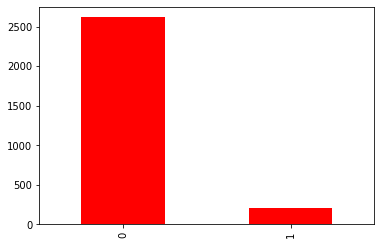

In [ ]:
data['FALL'].value_counts()
data['FALL'].value_counts().plot(kind = 'bar', color = 'red')
plt.show()

In [ ]:
np.any(np.isnan(data))

False

Il y a 202 falls pour 2619 marches normales. Il n'y a pas de données manquantes. Le dataset n'est pas équilibré. On va essayer de detecter les chutes en utilisant les méthodes vues en classe. 

## **Preparation des données**
On note X les variables explicatives et Y la variables target qui est la variable 'FALL' du dataset.
On prend pas la variable **'obs'** car elle correspond juste à un index pour les données.  


In [ ]:
from sklearn.model_selection import train_test_split
X = data.loc[:,'raw_feat_X1':'deriv_feat_X29']
Y = data.loc[:,'FALL']
X_train_originel, X_test_originel, y_train_originel, y_test_originel =  train_test_split(X, 
                                                     Y, 
                                                     test_size=0.25)

 - *X_train_originel* et *y_train_originel* désigne le data set sur lequelle nos modèles vont être entrainées.

- *X_test_originel* et *y_test_originel* désigne le data set sur lequelle nos modèles vont être évaluées. 

Le jeu de données étant deséquilibré:

On definit une fonction **balance_dataset** prend en paramètres le dataset, une variable booléenne *include_smote* qui permet de décider si on équilibre le data set ou non, et la variable *sampling_strategy_over*  est un réel entre 0 et 1 désignant le % d'oversampling de la classe minoritaire par rapport à la classe majoritaire.

In [ ]:
def balance_dataset(X = X_train_originel,Y = y_train_originel,include_smote = True,sampling_strategy_over = 0.1):

  '''
  Cette fonction  prend en paramètres le dataset, 
  une variable booléenne include_smote qui permet de décider si on équilibre le data set ou non, 
  et la variable sampling_strategy_over  est un réel entre 0 et 1 désignant 
  le % d'oversampling de la classe minoritaire par rapport à la classe majoritaire.

  '''
  Xt = X#data_set.loc[:,'raw_feat_X1':'deriv_feat_X29']
  Yt = Y#data_set.loc[:,'FALL']
  if include_smote == True:
    over = SMOTE(sampling_strategy_over)
    #under = RandomUnderSampler(sampling_strategy_under)
    #steps = [('u', under), ('o', over)]
    #pipeline = Pipeline(steps=steps)
    # transform the dataset
    X, Y = over.fit_resample(X, Y)
    X = pd.DataFrame(X)
    Y = pd.DataFrame(Y)
    Xt = X.set_axis(list(Xt.loc[:,'raw_feat_X1':'deriv_feat_X29'].columns), axis = 1, inplace=False)
    Yt = Y.set_axis(['FALL'], axis = 1, inplace = False)['FALL']
    #oversample = SMOTE()
    #X, Y = oversample.fit_resample(X, Y)
  return Xt,Yt

In [ ]:
X_train,y_train = balance_dataset(include_smote = True,sampling_strategy_over = 0.8)

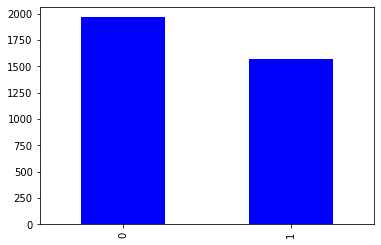

In [ ]:
y_train.value_counts().plot(kind = 'bar', color = 'blue')
plt.show()

# **Test and train on different algorithmes**



In [ ]:
def eval_metrics(y,y_pred):
  '''
  Calcul les metrics (accuracy, 'precision, 'recall', 'f1' et 'auc') en fonctions 
  
  des predictions fait par un modèle et des vrais valeurs.

  Le tout est renvoyé dans un dictionnaire
  '''

  accuracy = metrics.accuracy_score(y,y_pred)
  precision = metrics.precision_score(y,y_pred)
  recall =metrics.recall_score(y,y_pred)
  f1 = metrics.f1_score(y,y_pred)
  auc = metrics.roc_auc_score(y,y_pred)
  perf = {'accuracy' : accuracy,
          'precision' : precision,
          'recall' : recall,
          'f1' : f1,
          'auc' : auc}
  return perf

## **Entrainement Naif et pédictions des différents algorithmes.**


Dans premier temps, on a délibérement entrainé les modèles sur le jeux de données de train puis fait la prédiction sur le jeu de données test_originel en utilisant les hyperparamètres par défaut et ne faisant pas des Cross-validations rendraient les algorithmes plus robustes. 

Ceci juste pour lister les algorithmes utilisées et les performances de base ces algorithmes sur le jeu de test.

### **I. Naives Bayes** 

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnbfit = gnb.fit(X_train, y_train) ## train
#y_pred_test = gnbfit.predict(X_test) ## predict test
y_pred = gnbfit.predict(X_test_originel) ## predict test originel
y_pred_train = gnbfit.predict(X_train) ## predict train

E_test = (y_test_originel != y_pred).sum()/len(y_test_originel)
print("Error on the test data set %5.2f ->", E_test)


Error on the test data set %5.2f -> 0.028328611898016998


#### **I.1. Mesure de la performance**


In [ ]:
perf_GN_train = eval_metrics(y=y_train, y_pred=y_pred_train)
perf_GN_train

{'accuracy': 0.9505370265686829,
 'auc': 0.9486091804959114,
 'f1': 0.9436029648727039,
 'precision': 0.9562377531025473,
 'recall': 0.9312977099236641}

In [ ]:
perf_GN_test = eval_metrics(y=y_test_originel,y_pred=y_pred)
perf_GN_test

{'accuracy': 0.9716713881019831,
 'auc': 0.9760177988384524,
 'f1': 0.8387096774193548,
 'precision': 0.7323943661971831,
 'recall': 0.9811320754716981}

### **II. LDA** 

In [ ]:
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)


lda.fit(X_train, y_train)
y_pred = lda.predict(X_test_originel) ## predict test
y_pred_train = lda.predict(X_train) ## predict train


E_test = (y_test_originel != y_pred).sum()/len(y_test_originel)
print("Error on the test data set %5.2f ->", E_test)

Error on the test data set %5.2f -> 0.0113314447592068


#### **II.1. Mesure de la performance**


In [ ]:
perf_LDA_train = eval_metrics(y=y_train, y_pred=y_pred_train)
perf_LDA_train

{'accuracy': 0.9779536461277558,
 'auc': 0.9764019502017763,
 'f1': 0.9748711340206186,
 'precision': 0.987597911227154,
 'recall': 0.962468193384224}

In [ ]:
perf_LDA_test = eval_metrics(y=y_test_originel,y_pred=y_pred)
perf_LDA_test

{'accuracy': 0.9886685552407932,
 'auc': 0.9678696292871796,
 'f1': 0.9259259259259259,
 'precision': 0.9090909090909091,
 'recall': 0.9433962264150944}

### **III. QDA** 

In [ ]:
from sklearn.discriminant_analysis import  QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()


qda.fit(X_train, y_train)
y_pred = qda.predict(X_test_originel) ## predict test
y_pred_train = qda.predict(X_train) ## predict train


E_test = (y_test_originel != y_pred).sum()/len(y_test_originel)
print("Error on the test data set %5.2f ->", E_test)

Error on the test data set %5.2f -> 0.009915014164305949


#### **III.1. Mesure de la performance**


In [ ]:
perf_QDA_train = eval_metrics(y=y_train,y_pred=y_pred_train)
perf_QDA_train

{'accuracy': 0.9963256076879593,
 'auc': 0.996630051848343,
 'f1': 0.9958795562599049,
 'precision': 0.9924194567277321,
 'recall': 0.9993638676844784}

In [ ]:
perf_QDA_test = eval_metrics(y=y_test_originel,y_pred=y_pred)
perf_QDA_test

{'accuracy': 0.990084985835694,
 'auc': 0.9773035915513305,
 'f1': 0.9357798165137615,
 'precision': 0.9107142857142857,
 'recall': 0.9622641509433962}

### **IV) Logistic Regression**

In [ ]:
from sklearn import linear_model
logreg=linear_model.LogisticRegression();

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test_originel) ## predict test
y_pred_train = logreg.predict(X_train) ## predict train


E_test = (y_test_originel != y_pred).sum()/len(y_test_originel)
print("Error on the test data set %5.2f ->", E_test)


Error on the test data set %5.2f -> 0.0084985835694051


#### **IV.1. Mesure de la performance**


In [ ]:
#### train
perf_logreg_train = eval_metrics(y=y_train,y_pred=y_pred_train)
perf_logreg_train

{'accuracy': 0.9841718485019785,
 'auc': 0.9832081776977057,
 'f1': 0.9820512820512821,
 'precision': 0.9896640826873385,
 'recall': 0.9745547073791349}

In [ ]:
#### test
perf_logreg_test = eval_metrics(y=y_test_originel,y_pred=y_pred)
perf_logreg_test

{'accuracy': 0.9915014164305949,
 'auc': 0.9780692883354041,
 'f1': 0.9444444444444444,
 'precision': 0.9272727272727272,
 'recall': 0.9622641509433962}

### **V) K-Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5); ##
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test_originel) ## predict test
y_pred_train = knn.predict(X_train) ## predict train

E_test = (y_test_originel != y_pred).sum()/len(y_test_originel)
print("Error on the test data set %5.2f ->", E_test)


Error on the test data set %5.2f -> 0.04107648725212465


#### **V.1. Mesure de la performance**

In [ ]:
#### train
perf_knn_train = eval_metrics(y=y_train,y_pred=y_pred_train)
perf_knn_train

{'accuracy': 0.9810627473148672,
 'auc': 0.9828965828758098,
 'f1': 0.9791212215643502,
 'precision': 0.9596823457544288,
 'recall': 0.9993638676844784}

In [ ]:
#### test
perf_knn_test = eval_metrics(y=y_test_originel,y_pred=y_pred)
perf_knn_test

{'accuracy': 0.9589235127478754,
 'auc': 0.9431217313415585,
 'f1': 0.7716535433070866,
 'precision': 0.6621621621621622,
 'recall': 0.9245283018867925}

### **VI) Decisions Tree** 

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

y_pred = tree_clf.predict(X_test_originel) ## predict test
y_pred_train = tree_clf.predict(X_train) ## predict train

E_test = (y_test_originel != y_pred).sum()/len(y_test_originel)
print("Error on the test data set %5.2f ->", E_test)


Error on the test data set %5.2f -> 0.019830028328611898


#### **VI.1. Mesure de la performance**

In [ ]:
#### train
perf_tree_train = eval_metrics(y=y_train,y_pred=y_pred_train)
perf_tree_train

{'accuracy': 1.0, 'auc': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0}

In [ ]:
#### test
perf_tree_test = eval_metrics(y=y_test_originel,y_pred=y_pred)
perf_tree_test

{'accuracy': 0.9801699716713881,
 'auc': 0.9372706521425064,
 'f1': 0.8703703703703703,
 'precision': 0.8545454545454545,
 'recall': 0.8867924528301887}

### **VII) Random Forest** 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=10, random_state=0, oob_score = True)
RF.fit(X_train, y_train);

y_pred = RF.predict(X_test_originel)
y_pred_train = RF.predict(X_train)

E_test = (y_test_originel != y_pred).sum()/len(y_test_originel)
print("Error on the test data set %5.2f ->", E_test)

Error on the test data set %5.2f -> 0.009915014164305949


#### **VII.1. Mesure de la performance**

In [ ]:
#### train
perf_RF_train = eval_metrics(y=y_train,y_pred=y_pred_train)
perf_RF_train

{'accuracy': 1.0, 'auc': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0}

In [ ]:
#### test
perf_RF_test = eval_metrics(y=y_test_originel,y_pred=y_pred)
perf_RF_test

{'accuracy': 0.990084985835694,
 'auc': 0.9512987951110983,
 'f1': 0.9320388349514563,
 'precision': 0.96,
 'recall': 0.9056603773584906}

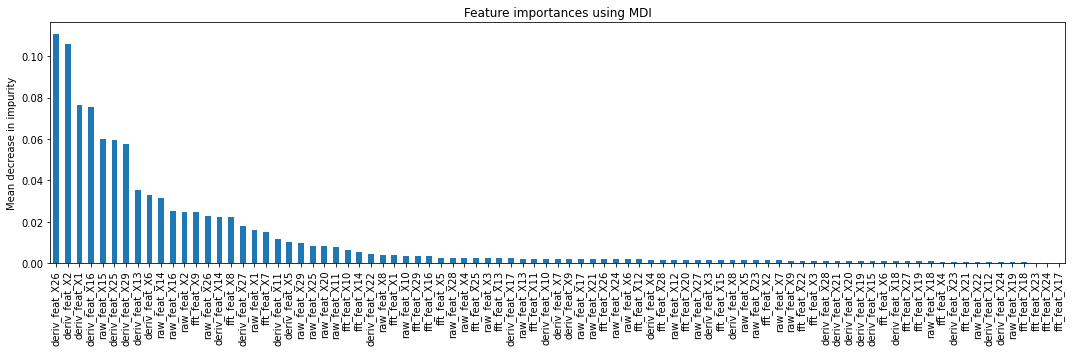

In [ ]:
import pandas as pd

importances = RF.feature_importances_
#std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots(figsize = (15,5))
forest_importances.sort_values(ascending=False).plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### **VIII) ADABOOST** 

In [ ]:
#### Training data
from sklearn.ensemble import AdaBoostClassifier
Ab = AdaBoostClassifier(n_estimators=100, random_state=0)
Ab.fit(X_train, y_train)
y_pred_train=Ab.predict(X_train);
y_pred=Ab.predict(X_test_originel);
E_test=(y_test_originel != y_pred).sum()/len(y_test_originel)
print("Boost Error on the complete training set %5.2f->",E_test)

Boost Error on the complete training set %5.2f-> 0.009915014164305949


#### **VIII.1. Mesure de la performance**

In [ ]:
#### train
perf_ada_train = eval_metrics(y=y_train,y_pred=y_pred_train)
perf_ada_train

{'accuracy': 1.0, 'auc': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0}

In [ ]:
#### test
perf_ada_test = eval_metrics(y=y_test_originel,y_pred=y_pred)
perf_ada_test

{'accuracy': 0.990084985835694,
 'auc': 0.9686353260712531,
 'f1': 0.9345794392523364,
 'precision': 0.9259259259259259,
 'recall': 0.9433962264150944}

### **IX) Gradient Boosting** 

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=0)
GB = GradientBoostingClassifier(random_state=0)
GB.fit(X_train, y_train)
y_pred=GB.predict(X_test_originel)
E_test=(y_test_originel != y_pred).sum()/len(y_test_originel)
print("Boost Error on the complete test set %5.2f->",E_test)

Boost Error on the complete test set %5.2f-> 0.009915014164305949


#### **IX.1. Mesure de la performance**

In [ ]:
#### train
perf_GB_train = eval_metrics(y=y_train,y_pred=y_pred_train)
perf_GB_train

{'accuracy': 1.0, 'auc': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0}

In [ ]:
#### test
perf_GB_test = eval_metrics(y=y_test_originel,y_pred=y_pred)
perf_GB_test

{'accuracy': 0.990084985835694,
 'auc': 0.9599670605911756,
 'f1': 0.9333333333333333,
 'precision': 0.9423076923076923,
 'recall': 0.9245283018867925}

### **Recapitulatif des performances des algorithmes**

In [ ]:
pd.DataFrame( {'gnb': perf_GN_train, 
               'LDA': perf_LDA_train, 
               'QDA' : perf_QDA_train, 
               'logreg' : perf_logreg_train,
               'knn' : perf_knn_train,
               'tree' : perf_tree_train,
               'RF' : perf_RF_train,
               'Adaboost' : perf_ada_train,
               'GB' : perf_GB_train})

,gnb,LDA,QDA,logreg,knn,tree,RF,Adaboost,GB
accuracy,0.950537,0.977954,0.996326,0.984172,0.981063,1.0,1.0,1.0,1.0
precision,0.956238,0.987598,0.992419,0.989664,0.959682,1.0,1.0,1.0,1.0
recall,0.931298,0.962468,0.999364,0.974555,0.999364,1.0,1.0,1.0,1.0
f1,0.943603,0.974871,0.995880,0.982051,0.979121,1.0,1.0,1.0,1.0
auc,0.948609,0.976402,0.996630,0.983208,0.982897,1.0,1.0,1.0,1.0


In [ ]:
pd.DataFrame( {'gnb': perf_GN_test, 
               'LDA': perf_LDA_test, 
               'QDA' : perf_QDA_test, 
               'logreg' : perf_logreg_test,
               'knn' : perf_knn_test,
               'tree' : perf_tree_test,
               'RF' : perf_RF_test,
               'Adaboost' : perf_ada_test,
               'GB' : perf_GB_test})

,gnb,LDA,QDA,logreg,knn,tree,RF,Adaboost,GB
accuracy,0.971671,0.988669,0.990085,0.991501,0.958924,0.980170,0.990085,0.990085,0.990085
precision,0.732394,0.909091,0.910714,0.927273,0.662162,0.854545,0.960000,0.925926,0.942308
recall,0.981132,0.943396,0.962264,0.962264,0.924528,0.886792,0.905660,0.943396,0.924528
f1,0.838710,0.925926,0.935780,0.944444,0.771654,0.870370,0.932039,0.934579,0.933333
auc,0.976018,0.967870,0.977304,0.978069,0.943122,0.937271,0.951299,0.968635,0.959967


## **Recherche des meilleurs hyparametres pour knn, tree, RF, adaboost and GB**

on va faire un gridSearch pour ses 5 modèles pour trouver les meilleurs hyperparamètres.

In [ ]:
#### initiliations des grilles de parametres
params = {'knn' : {'n_neighbors' :list(range(1,30))},
          'tree' : {'max_depth': [None,1,3, 5, 7],
              'min_samples_split': [2, 5, 10]},
          'RF' : {'n_estimators' : [int(x) for x in np.linspace(10,200, num = 25) ],
                'max_features' : ['auto', 'sqrt'],
                 'max_depth' : [None,1,3, 5, 7], 
                'bootstrap' : [False,True]}, # [int(x) for x in np.linspace(10, 110, num = 11)],
                #'oob_score' : [F]},
          'Adaboost' : {'n_estimators' : [int(x) for x in np.linspace(10,200, num = 25)],
                       'learning_rate' : [0.001,0.01,0.1,0.2,0.5]},
                       #'max_depth' : [3, 5, 7,9, None]},
          'GB' : {'learning_rate' : [0.3, 0.2, 0.1, 0.01, 0.001],
                 'n_estimators' : [int(x) for x in np.linspace(10,200, num = 25) ],
                 'max_depth' : [7,None]}
         }

### Initialisation des models
def get_models():
    models = dict()
    models['GB'] = GradientBoostingClassifier()
    models['RF'] = RandomForestClassifier()
    models['knn'] = KNeighborsClassifier()
    models['tree'] = DecisionTreeClassifier()
    models['Adaboost'] = AdaBoostClassifier()
    
    return models

models_sans_hyp = {'gnb' : gnb,
 'lda' : lda,
 'qda' : qda,
 'logreg' : logreg}
  

### **A. Recherches des meilleurs hyperparamètres**

In [ ]:

import pandas as pd
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
import time 

models = get_models()
perf = {}
model_trained = {}
X_train_hyp, X_val, y_train_hyp, y_val =  train_test_split(X_train, 
                                                     y_train, 
                                                     test_size=1/4)

#scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision','f1_score' : 'f1', 'recall' : 'recall'}
i = 1
for name, model in models.items():
    print("-----------------tunning hyperparameters model {} : {}----------------".format(i, name))
    i+=1
    start = time.time()
    model_i = GridSearchCV(model,
                  param_grid=params[name],cv = 3,
                  scoring='recall', refit='recall', verbose=2, n_jobs=-1 ,return_train_score=True).fit(X_train_hyp, y_train_hyp)
    
    print('Execution time {}   : {} seconds'.format(name,time.time() - start))

    model_trained[name] = model_i
    y_pred = model_i.predict(X_val)
    perf[name] = eval_metrics(y = y_val, y_pred = y_pred)
#stackModel.fit(X_train, y_train)
#y_pred = stackModel.predict(X_test)
#perf['stack'] = scoring_function(y_test, y_pred)

-----------------tunning hyperparameters model 1 : GB----------------
Fitting 3 folds for each of 250 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 40.8min finished


Execution time GB   : 2451.6676666736603 seconds
-----------------tunning hyperparameters model 2 : RF----------------
Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1021 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1466 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 12.6min finished


Execution time RF   : 756.1101734638214 seconds
-----------------tunning hyperparameters model 3 : knn----------------
Fitting 3 folds for each of 29 candidates, totalling 87 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:   39.5s finished


Execution time knn   : 39.61282420158386 seconds
-----------------tunning hyperparameters model 4 : tree----------------
Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.1s finished


Execution time tree   : 2.339184522628784 seconds
-----------------tunning hyperparameters model 5 : Adaboost----------------
Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  9.1min finished


Execution time Adaboost   : 548.4180133342743 seconds


### **B. Performance des modèles avec meilleurs hyperparamètres sur le jeux de données de validation**

In [ ]:
for name, _ in model_trained.items():
  print(model_trained[name].best_estimator_)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=105,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
              

In [ ]:
 pd.DataFrame(perf)

,GB,RF,knn,tree,Adaboost
accuracy,0.993220,0.993220,0.976271,0.986441,0.988701
precision,0.986877,0.989446,0.947236,0.976501,0.984169
recall,0.997347,0.994695,1.000000,0.992042,0.989390
f1,0.992084,0.992063,0.972903,0.984211,0.986772
auc,0.993752,0.993410,0.979331,0.987163,0.988789


### **C .Comparaison des differents classifiers (tuned avec les meilleurs hyparamètres) sur les données de train**  

In [ ]:
## regroupe tous les modèles  

models_tuned = {}
for name, _ in models.items():
  models_tuned[name] = model_trained[name].best_estimator_
models_tuned
for name,model in models_sans_hyp.items():
  models_tuned[name] = model 

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold

kf = KFold(n_splits= 10,shuffle=True)
result_perf_train = {'accuracy' : pd.DataFrame(),
              'precision' : pd.DataFrame(),
              'recall' : pd.DataFrame(),
              'f1' : pd.DataFrame(),
              'auc' : pd.DataFrame()}

result_perf_test = {'accuracy' : pd.DataFrame(),
              'precision' : pd.DataFrame(),
              'recall' : pd.DataFrame(),
              'f1' : pd.DataFrame(),
              'auc' : pd.DataFrame()}

models_tuned_fit = {} ## sauve tout les modèles entrainés dans ce dictionnaire 
j = 0
for train_index, test_index in kf.split(X_train):
  ### selection du fold
    X_train_kf, X_test_kf = X_train.iloc[train_index,:], X_train.iloc[test_index,:] 
    y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
    
    ### training and testing of models
    for name, model in models_tuned.items():
        modelfit = model.fit(X_train_kf, y_train_kf)
        models_tuned_fit[name] = modelfit
        pred_train_kf= modelfit.predict(X_train_kf)
        pred_test_kf = modelfit.predict(X_test_kf)
        
        ##### computation of the performances 
        perf_train = eval_metrics(y_train_kf,pred_train_kf)
        perf_test = eval_metrics(y_test_kf,pred_test_kf)
        
        for perf_indicator, val_indicator in perf_train.items():
          result_perf_train[perf_indicator].loc[j,name] = val_indicator
        for perf_indicator, val_indicator in perf_test.items():
          result_perf_test[perf_indicator].loc[j,name] = val_indicator
    j+=1
#data = [accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, auc_train, auc_test]


In [ ]:
def boxplot_metrics_cv(name):
  f = plt.figure(figsize=(20,5))
  ax = plt.subplot(131)
  ax.boxplot(result_perf_test[name[0]].T,labels = list(result_perf_train[name[0]].columns),showmeans=True)
  ax.set_title(name[0] , fontdict = {'fontsize' : 16})
  ax = plt.subplot(132)
  ax.boxplot(result_perf_test[name[1]].T,labels = list(result_perf_test[name[1]].columns),showmeans=True)
  ax.set_title(name[1] , fontdict = {'fontsize' : 16})
  ax = plt.subplot(133)
  ax.boxplot(result_perf_test[name[2]].T,labels = list(result_perf_test[name[2]].columns),showmeans=True)
  ax.set_title(name[2] , fontdict = {'fontsize' : 16})
  plt.show()

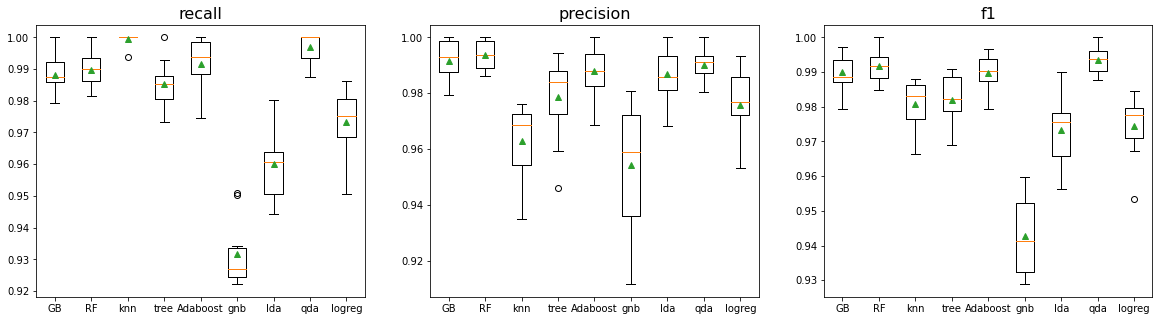

In [ ]:
name = ["recall","precision","f1"]
boxplot_metrics_cv(name)

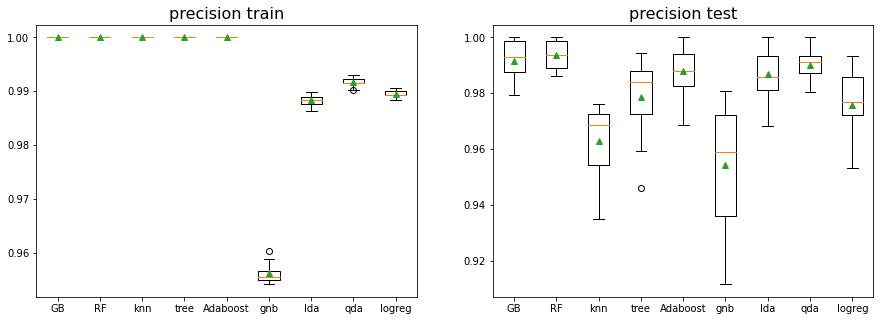

In [ ]:
name = "precision"
boxplot_metrics_cv(name)

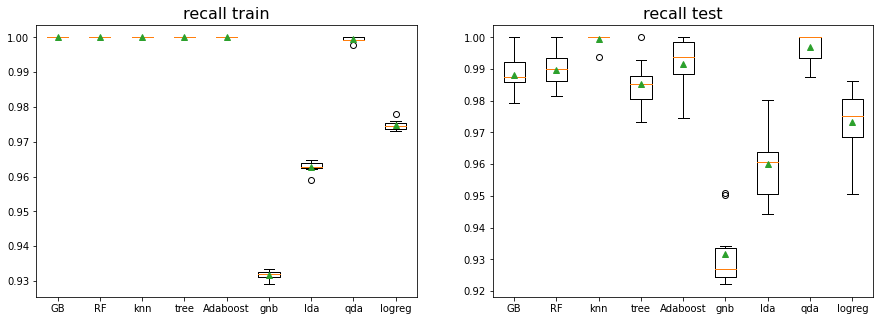

In [ ]:
name = "recall"
boxplot_metrics_cv(name)

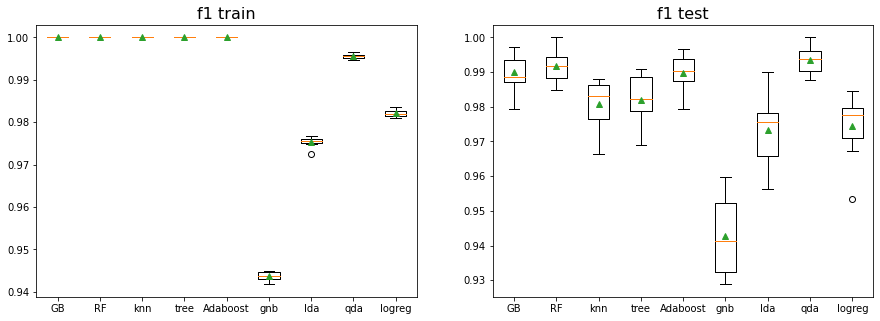

In [ ]:
name = 'f1'
boxplot_metrics_cv(name)

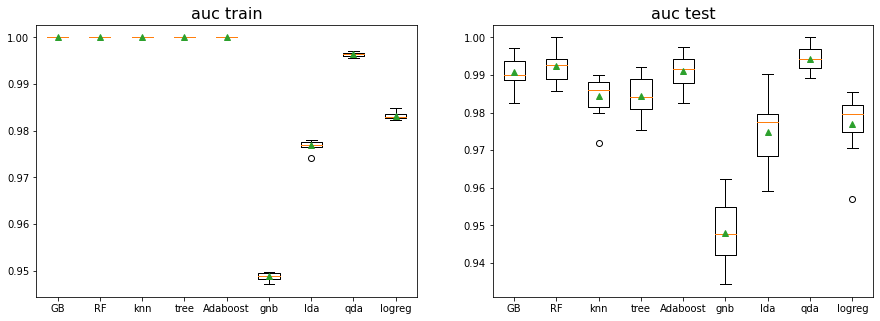

In [ ]:
name = 'auc'
boxplot_metrics_cv(name)

## **Performance finale sur les données de test**
On évalue les différents modèles sur les données de test *X_test_originel* pou évaluer leurs performances sur un jeu jamais rencontré.

In [ ]:
def evaluate_models(models = models_tuned_fit, X = X_test_originel,Y=y_test_originel):
  "Cette fonction evalue la performances des modèles entrainés sur le jeux de données (X,Y)"
  
  result_perf = {} # dictionnaire contenant les métrics d'évaluation des différents modèles
  pred_final =  {}
  for name, model in models.items():
      
      pred= model.predict(X)  #
      pred_final[name] = pred
      ##### computation of the performances 
      perf = eval_metrics(Y,pred)
      result_perf[name] = perf
  return pd.DataFrame(result_perf), pred_final

In [ ]:
performance_test_final, pred_test_originel = evaluate_models()

In [ ]:
performance_test_final

,GB,RF,knn,tree,Adaboost,gnb,lda,qda,logreg
accuracy,0.987252,0.990085,0.971671,0.975921,0.983003,0.973088,0.988669,0.991501,0.990085
precision,0.907407,0.960000,0.753846,0.800000,0.847458,0.742857,0.909091,0.927273,0.925926
recall,0.924528,0.905660,0.924528,0.905660,0.943396,0.981132,0.943396,0.962264,0.943396
f1,0.915888,0.932039,0.830508,0.849558,0.892857,0.845528,0.925926,0.944444,0.934579
auc,0.958436,0.951299,0.950013,0.943642,0.964807,0.976783,0.967870,0.978069,0.968635


In [ ]:
y_test_originel.value_counts()

0    653
1     53
Name: FALL, dtype: int64

In [ ]:
metrics.confusion_matrix(y_test_originel,pred_test_originel['RF'])

array([[651,   2],
       [  5,  48]])

In [ ]:
metrics.confusion_matrix(y_test_originel,pred_test_originel['qda'])

array([[649,   4],
       [  2,  51]])

In [ ]:
metrics.confusion_matrix(y_test_originel,pred_test_originel['logreg'])

array([[649,   4],
       [  3,  50]])